In [123]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import os

# 한글 폰트 사용을 위해서 세팅
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/malgun.ttf"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

import matplotlib.ticker as ticker

# 뉴스 빈도

In [44]:
df = pd.read_csv('./data/개별기업뉴스_전처리/AJ네트웍스.csv',index_col=0)
print(len(df))
df.head()

907


,날짜,뉴스제목,뉴스요약
1313,2016-01-04,"AJ네트웍스, SKB 등에업고 '고리사채급 위약금 폭탄'",AJ네트웍스가 SK브로드밴드를 통해 진행중인 '스마트렌탈'의 위약금 규정 및 취급상...
1312,2016-01-05,"AJ네트웍스, 스마트폰, 태블릿PC 렌탈사업 시작","국내 IT기기 렌탈의 선두주자인 AJ네트웍스에서 Mobile Device(스마트폰,..."
1311,2016-01-06,"AJ네트웍스, 스마트폰, 태블릿PC 등 Mobile Device 렌탈 사업 시작","국내 IT기기 렌탈의 선두주자인 AJ네트웍스에서 Mobile Device(스마트폰,..."
1332,2016-01-13,"AJ네트웍스, 파렛트및 고소장비 렌탈 신규 서비스 브랜드 런칭",AJ네트웍스(사장 반채운)가 파렛트와 고소장비 렌탈 부문의 신규 서비스 브랜드를 런...
1335,2016-01-22,대상·AJ네트웍스 등 비우량채도 잇달아 발행 성공,신용등급이 BBB+인 AJ네트웍스도 회사채 발행을 위해 지난 20일 투자자들을 대상...


In [12]:
df['날짜'].value_counts().unique()

array([15,  7,  6,  5,  4,  3,  2,  1], dtype=int64)

In [ ]:
idx = pd.date_range('2016-01-01','2022-05-30')

ser_date = df['날짜'].value_counts().sort_index()

ser_date.index = pd.DatetimeIndex(ser_date.index)

ser_date = ser_date.reindex(idx, fill_value=0)
ser_date

In [45]:
def fill_count_date(df ,bgn_date = '2016-01-01',end_date = '2022-03-31'):
    
    idx = pd.date_range(bgn_date,end_date)

    ser_date = df['날짜'].value_counts().sort_index()

    ser_date.index = pd.DatetimeIndex(ser_date.index)

    ser_date = ser_date.reindex(idx, fill_value=0)
    
    return ser_date

In [46]:
ser_count = fill_count_date(df)

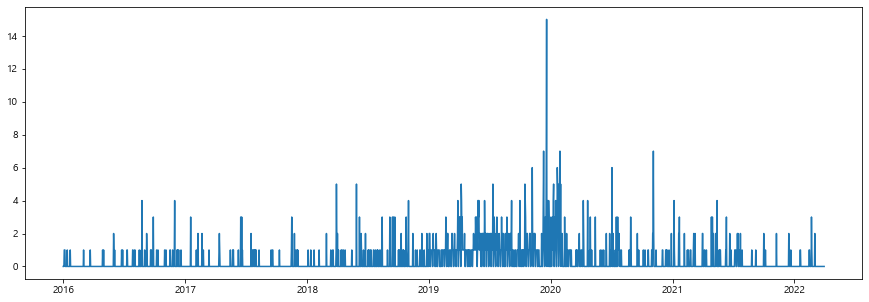

In [47]:
plt.figure(figsize=(15,5))
ax = plt.axes()
ax.yaxis.set_major_locator(ticker.MultipleLocator(1))
plt.plot(ser_count.index, ser_count)

# (1)공시 빈도: 중복제거 x

In [75]:
df = pd.read_csv('./data/공시_다트크롤링/AK홀딩스.csv',index_col=0)
df = df[['접수일자','공시대상회사','보고서명']]
df.columns = ['날짜','공시회사','공시보고서명']
print(len(df))
df.head()

434


,날짜,공시회사,공시보고서명
0,2022.05.25,유 AK홀딩스,[기재정정]투자판단관련주요경영사항 (자회사의 주요경영사항)
1,2022.05.16,유 AK홀딩스,분기보고서 (2022.03)
2,2022.05.13,유 AK홀딩스,주주총회소집결의
3,2022.05.04,유 AK홀딩스,주식등의대량보유상황보고서(일반)
4,2022.04.28,유 AK홀딩스,주식등의대량보유상황보고서(일반)


In [76]:
df['날짜'].value_counts()

2019.02.13    6
2021.02.15    6
2020.03.19    4
2020.04.07    4
2017.03.16    4
             ..
2019.08.26    1
2019.08.13    1
2019.08.09    1
2019.07.25    1
2016.01.04    1
Name: 날짜, Length: 303, dtype: int64

In [77]:
df.head()

,날짜,공시회사,공시보고서명
0,2022.05.25,유 AK홀딩스,[기재정정]투자판단관련주요경영사항 (자회사의 주요경영사항)
1,2022.05.16,유 AK홀딩스,분기보고서 (2022.03)
2,2022.05.13,유 AK홀딩스,주주총회소집결의
3,2022.05.04,유 AK홀딩스,주식등의대량보유상황보고서(일반)
4,2022.04.28,유 AK홀딩스,주식등의대량보유상황보고서(일반)


In [78]:
fill_count_date(df)

2016-01-01    0
2016-01-02    0
2016-01-03    0
2016-01-04    1
2016-01-05    0
             ..
2022-03-27    0
2022-03-28    0
2022-03-29    3
2022-03-30    0
2022-03-31    0
Freq: D, Name: 날짜, Length: 2282, dtype: int64

## 시각화

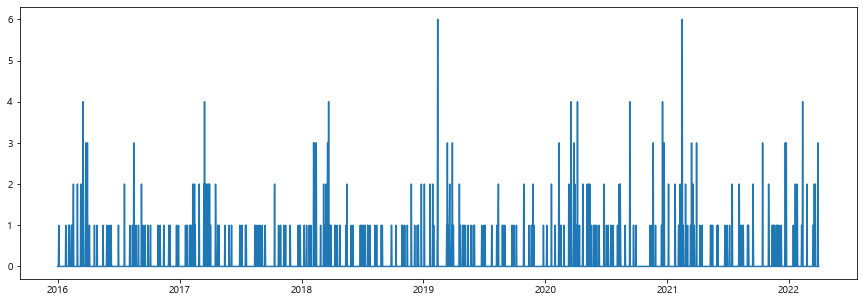

In [79]:
ser_count = fill_count_date(df)
plt.figure(figsize=(15,5))
ax = plt.axes()
ax.yaxis.set_major_locator(ticker.MultipleLocator(1))
plt.plot(ser_count.index, ser_count)

# (2)공시 빈도: 중복제거 

In [102]:
df = pd.read_csv('./data/공시_다트크롤링/AK홀딩스.csv',index_col=0)
df.head()

,번호,공시대상회사,보고서명,제출인,접수일자,비고
0,1,유 AK홀딩스,[기재정정]투자판단관련주요경영사항 (자회사의 주요경영사항),AK홀딩스,2022.05.25,유
1,2,유 AK홀딩스,분기보고서 (2022.03),AK홀딩스,2022.05.16,NaN
2,3,유 AK홀딩스,주주총회소집결의,AK홀딩스,2022.05.13,유
3,4,유 AK홀딩스,주식등의대량보유상황보고서(일반),채형석,2022.05.04,NaN
4,5,유 AK홀딩스,주식등의대량보유상황보고서(일반),채형석,2022.04.28,NaN


In [103]:
df = df[['접수일자','공시대상회사','보고서명']]
df.columns = ['날짜','회사이름','공시보고서명']

In [106]:
df[df.duplicated()]

,날짜,회사이름,공시보고서명
2,2022.03.18,유 AK홀딩스,감사보고서제출 (자회사의 주요경영사항)
9,2021.12.21,유 AK홀딩스,타인에대한채무보증결정
7,2021.11.01,유 AK홀딩스,지주회사의자회사탈퇴
9,2021.07.15,유 AK홀딩스,현금ㆍ현물배당결정 (자회사의 주요경영사항)
11,2021.03.19,유 AK홀딩스,감사보고서제출 (자회사의 주요경영사항)
13,2021.03.17,유 AK홀딩스,감사보고서제출 (자회사의 주요경영사항)
9,2021.02.15,유 AK홀딩스,매출액또는손익구조30%(대규모법인은15%)이상변경 (자회사의 주요경영사항)
9,2020.12.23,유 AK홀딩스,[기재정정]주요사항보고서(전환사채권발행결정) (자회사의 주요경영사항)
2,2020.11.20,유 AK홀딩스,타인에대한채무보증결정
9,2020.09.11,유 AK홀딩스,임원ㆍ주요주주특정증권등소유상황보고서


In [107]:
df[df['날짜']=='2022.03.18']

,날짜,회사이름,공시보고서명
1,2022.03.18,유 AK홀딩스,감사보고서제출 (자회사의 주요경영사항)
2,2022.03.18,유 AK홀딩스,감사보고서제출 (자회사의 주요경영사항)


In [83]:
fill_count_date(df)

2016-01-01    0
2016-01-02    0
2016-01-03    0
2016-01-04    0
2016-01-05    0
             ..
2022-03-27    0
2022-03-28    0
2022-03-29    2
2022-03-30    0
2022-03-31    0
Freq: D, Name: 날짜, Length: 2282, dtype: int64

## 시각화

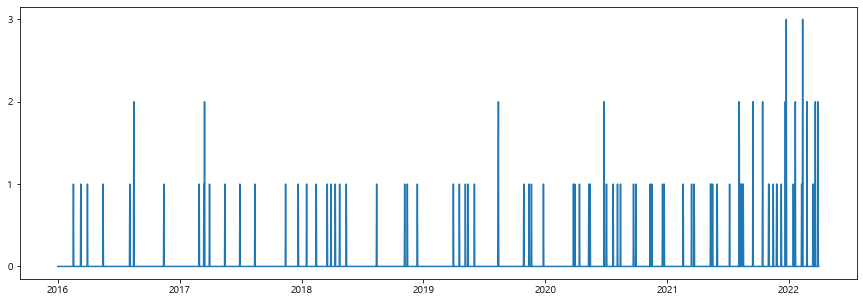

In [84]:
ser_count = fill_count_date(df)
plt.figure(figsize=(15,5))
ax = plt.axes()
ax.yaxis.set_major_locator(ticker.MultipleLocator(1))
plt.plot(ser_count.index, ser_count)

# 합친코드: 뉴스빈도, 공시빈도1, 공시빈도2(중복제거)

In [124]:
def fill_count_date(df ,bgn_date = '2016-01-01',end_date = '2022-03-31'):
    idx = pd.date_range(bgn_date,end_date)
    ser_date = df['날짜'].value_counts().sort_index()
    ser_date.index = pd.DatetimeIndex(ser_date.index)
    ser_date = ser_date.reindex(idx, fill_value=0)
    return ser_date

In [125]:
# 뉴스
df = pd.read_csv('./data/개별기업뉴스_전처리/AJ네트웍스.csv',index_col=0)
df_news = fill_count_date(df).to_frame()
df_news.columns=['뉴스빈도']
df_news.head()

,뉴스빈도
2016-01-01,0
2016-01-02,0
2016-01-03,0
2016-01-04,1
2016-01-05,1


In [ ]:
for file in file_list_n[:1]:
    corp_name_n = file[:-4]
    
    file_path_n = os.path.join(path,file)

    df_n = pd.read_csv(file_path_n,index_col=0)
    
    # 뉴스빈도
    df_news = fill_count_date(df_n).to_frame()
    df_news.columns=['뉴스빈도']

In [115]:
# 공시1
df = pd.read_csv('./data/공시_다트크롤링/AK홀딩스.csv',index_col=0)
df = df[['접수일자','공시대상회사','보고서명']]
df.columns = ['날짜','공시회사','공시보고서명']
df_count1 = fill_count_date(df).to_frame()
# 공시2 중복제거
df.drop_duplicates(inplace = True)
df_count2 = fill_count_date(df).to_frame()
# 합치기
df_a = pd.concat([df_count1,df_count2],axis=1)
df_a.columns = ['공시빈도','공시빈도(중복제거)']
df_a

,공시빈도,공시빈도(중복제거)
2016-01-01,0,0
2016-01-02,0,0
2016-01-03,0,0
2016-01-04,1,1
2016-01-05,0,0
...,...,...
2022-03-27,0,0
2022-03-28,0,0
2022-03-29,3,3
2022-03-30,0,0


In [112]:
df_a.loc['2020.04.07']

공시횟수          4
공시횟수(중복제거)    1
Name: 2020-04-07 00:00:00, dtype: int64

In [116]:
# 뉴스 공시 모두 합치기
df_count = pd.concat([df_news,df_a],axis=1)
df_count

,뉴스빈도,공시빈도,공시빈도(중복제거)
2016-01-01,0,0,0
2016-01-02,0,0,0
2016-01-03,0,0,0
2016-01-04,1,1,1
2016-01-05,1,0,0
...,...,...,...
2022-03-27,0,0,0
2022-03-28,0,0,0
2022-03-29,0,3,3
2022-03-30,0,0,0


# (완성)모든파일 뉴스,공시빈도 데이터 만들기

In [119]:
def fill_count_date(df ,bgn_date = '2016-01-01',end_date = '2022-03-31'):
    idx = pd.date_range(bgn_date,end_date)
    ser_date = df['날짜'].value_counts().sort_index()
    ser_date.index = pd.DatetimeIndex(ser_date.index)
    ser_date = ser_date.reindex(idx, fill_value=0)
    return ser_date

In [118]:
# 뉴스
path = './data/개별기업뉴스_전처리/'
file_list = os.listdir(path)

In [143]:

# 뉴스
path_n = './data/개별기업뉴스_전처리/'
file_list_n = os.listdir(path_n)

# 기업 820개
for file in file_list_n[:]:
    corp_name_n = file[:-4]
    
    file_path_n = os.path.join(path_n,file)

    df_n = pd.read_csv(file_path_n,index_col=0)
    
    # 뉴스빈도
    df_news = fill_count_date(df_n).to_frame()
    df_news.columns=['뉴스빈도']


    # 공시파일
    path_a = './data/공시_다트크롤링/'
    file_list_a = os.listdir(path_a)
    
    # 공시회사 820개
    for file_a in file_list_a:
        corp_name_a = file_a[:-4]
        if corp_name_a == corp_name_n: 
            file_path_a = os.path.join(path_a,file_a)
            df_a = pd.read_csv(file_path_a,index_col=0)
            df_a = df_a[['접수일자','공시대상회사','보고서명']]
            df_a.columns = ['날짜','공시회사','공시보고서명']

            # 공시1
            df_count1 = fill_count_date(df_a).to_frame()
            # 공시2 중복제거
            df_a.drop_duplicates(inplace = True)
            df_count2 = fill_count_date(df_a).to_frame()

            # 합치기
            df_an = pd.concat([df_count1,df_count2],axis=1)
            df_an.columns = ['공시빈도','공시빈도(중복제거)']
            
            break
            
    # 뉴스 공시 둘다 합치기
    df_total = pd.concat([df_news,df_an],axis=1)
    df_total.to_csv('./data/뉴스공시빈도데이터/{}.csv'.format(corp_name_n))

    

In [135]:
corp_name_n

'흥아해운'

In [136]:
corp_name_a

'AJ네트웍스'

In [142]:
len(file_list_n)

820